In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


**EDA**


In [4]:
#upload file into pandas df
from google.colab import files
uploaded = files.upload()

Saving all_seasons.csv to all_seasons.csv


In [5]:
# Get the filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

# Read the file into a pandas DataFrame
df = pd.read_csv(filename)  # Assuming it's a CSV file, change to read_excel if it's an Excel file

#display first 5 row df
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [6]:
# Visualize distributions
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Points Distribution')

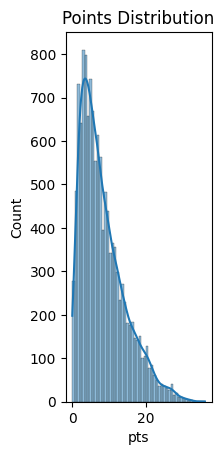

In [7]:
# Point distribution
plt.subplot(1, 3, 1)
sns.histplot(df['pts'], kde=True)
plt.title('Points Distribution')

Text(0.5, 1.0, 'Assists Distribution')

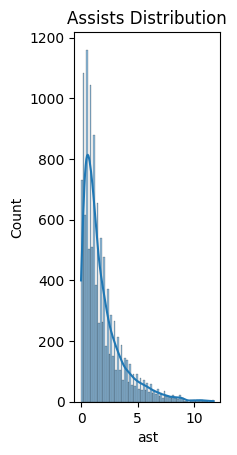

In [8]:
# Assists distribution
plt.subplot(1, 3, 2)
sns.histplot(df['ast'], kde=True)
plt.title('Assists Distribution')

Text(0.5, 1.0, 'Rebounds Distribution')

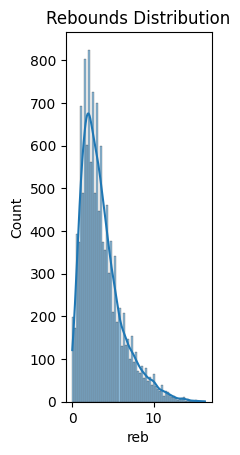

In [9]:
# Rebounds distribution
plt.subplot(1, 3, 3)
sns.histplot(df['reb'], kde=True)
plt.title('Rebounds Distribution')

In [10]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

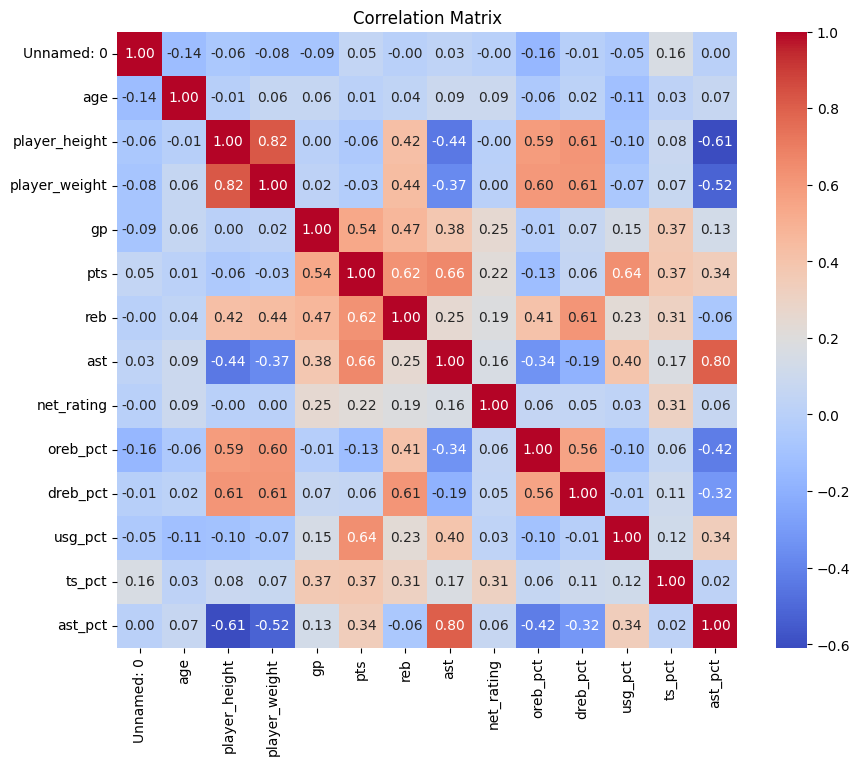

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix, only including numeric columns
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Feature Engineering**

In [12]:
# Creating a rolling average feature
df['pts_rolling_avg'] = df['pts'].rolling(window=5).mean()
df['ast_rolling_avg'] = df['ast'].rolling(window=5).mean()
df['reb_rolling_avg'] = df['reb'].rolling(window=5).mean()

In [13]:
from sklearn.preprocessing import StandardScaler

#Normalizing Features
scaler = StandardScaler()
df[['pts', 'ast', 'reb', 'pts_rolling_avg', 'ast_rolling_avg', 'reb_rolling_avg']] = scaler.fit_transform(
df[['pts', 'ast', 'reb', 'pts_rolling_avg', 'ast_rolling_avg', 'reb_rolling_avg']]
)

**Feature Selection**

In [14]:
# Identify features with high correlation to the target variable
target = 'ast'
high_correlation_features = correlation_matrix[target][abs(correlation_matrix[target]) > 0.3].index.tolist()

In [15]:
from sklearn.ensemble import RandomForestRegressor

#Feature Importance Measures
X = df[high_correlation_features].drop(columns=[target])
y = df[target]

model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

**Model Training**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Evaluation
print("Linear Regression R^2:", r2_score(y_test, linear_predictions))
print("Linear Regression MAE:", mean_absolute_error(y_test, linear_predictions))
print("Ridge Regression R^2:", r2_score(y_test, ridge_predictions))
print("Ridge Regression MAE:", mean_absolute_error(y_test, ridge_predictions))

Linear Regression R^2: 0.8506930614663861
Linear Regression MAE: 0.23888684052727077
Ridge Regression R^2: 0.8497595099436174
Ridge Regression MAE: 0.24078612287496584


**Feature Analysis**

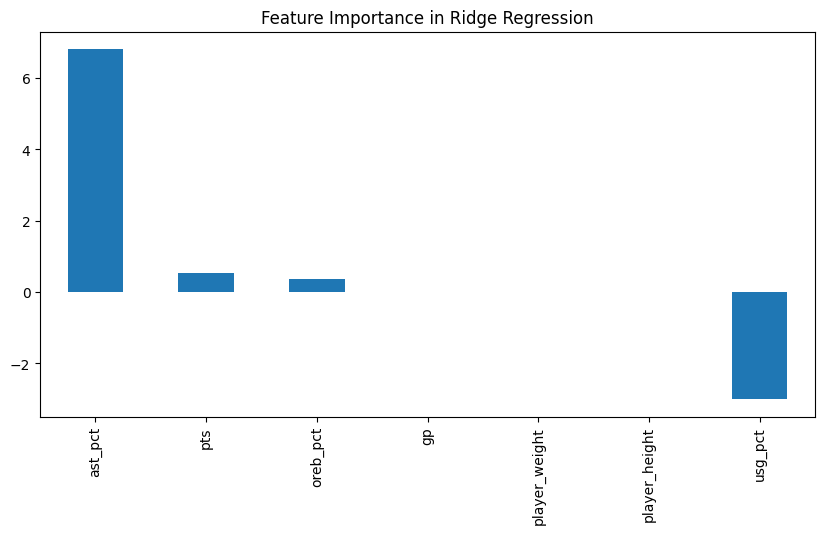

In [17]:
# Feature Importance from Ridge Regression
ridge_importances = pd.Series(ridge_model.coef_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ridge_importances.plot(kind='bar')
plt.title('Feature Importance in Ridge Regression')
plt.show()